# 14.75 Problem Set 3 (Max Ghenis)

## 1 - voting data

### 1a
>Mathematically prove that the fixed effects estimation of  
$y_{it} = \gamma_0 + \alpha_i + \beta_0 x_{it} + \epsilon_{it}$  
delivers a numerically identical coefficient to the regression of $y_{it}$'s deviation from its time average $y_{i\cdot}:= T^{−1} \sum_t y_{it}$ on $x_{it}$’s deviation from its time average.

$y_{it} - T^{-1} \sum_t y_{it} = \gamma_0 + \beta_0 (x_{it} - T^{-1} \sum_t x_{it}) + \epsilon_{it}$

$y_{it} - T^{-1} \sum_t y_{it} = \gamma_0 - \beta_0 T^{-1} \sum_t x_{it} + \beta_0 x_{it} + \epsilon_{it}$

$y_{it} = \gamma_0 + T^{-1} \sum_t (y_{it} - \beta_0 x_{it}) + \beta_0 x_{it} + \epsilon_{it}$

Let $\alpha_i := T^{-1} \sum_t (y_{it} - \beta_0 x_{it})$

$y_{it} = \gamma_0 + \alpha_i + \beta_0 x_{it} + \epsilon_{it}$

### 1b

>As a man of science, Bruce Wayne has decided to donate campaign contributions to
random candidates in each of 100 county elections for each of the last 10 years. However, his campaign contribution amounts may vary, systematically, with the county.
That is, Bruce may favor giving contributions more in some counties than in others.

In [1]:
suppressMessages({
    library(tidyverse)
    library(magrittr)
    })

In [2]:
load('votingData.RData')

#### 1b(i)
>Regress the vote percent received by Wayne’s party on the campaign donation.

In [3]:
summary(votingData)

     county            year      campaignDonation  votePercent    
 Min.   :  1.00   Min.   : 1.0   Min.   :13.18    Min.   :0.2092  
 1st Qu.: 25.75   1st Qu.: 3.0   1st Qu.:28.53    1st Qu.:0.4920  
 Median : 50.50   Median : 5.5   Median :35.77    Median :0.5804  
 Mean   : 50.50   Mean   : 5.5   Mean   :35.63    Mean   :0.5789  
 3rd Qu.: 75.25   3rd Qu.: 8.0   3rd Qu.:42.38    3rd Qu.:0.6683  
 Max.   :100.00   Max.   :10.0   Max.   :64.42    Max.   :0.8627  

In [4]:
votingData %<>% transform(
    campaignDonationNorm =
    (campaignDonation - mean(votingData$campaignDonation)) / 
     sd(votingData$campaignDonation))

In [5]:
summary(lm(votePercent ~ campaignDonation, data=votingData))


Call:
lm(formula = votePercent ~ campaignDonation, data = votingData)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.124117 -0.022814 -0.000893  0.023577  0.097810 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       1.0078643  0.0043062   234.1   <2e-16 ***
campaignDonation -0.0120381  0.0001168  -103.1   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.035 on 998 degrees of freedom
Multiple R-squared:  0.9141,	Adjusted R-squared:  0.914 
F-statistic: 1.062e+04 on 1 and 998 DF,  p-value: < 2.2e-16


In [6]:
summary(lm(votePercent ~ campaignDonationNorm, data=votingData))


Call:
lm(formula = votePercent ~ campaignDonationNorm, data = votingData)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.124117 -0.022814 -0.000893  0.023577  0.097810 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.578912   0.001107   523.1   <2e-16 ***
campaignDonationNorm -0.114128   0.001107  -103.1   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.035 on 998 degrees of freedom
Multiple R-squared:  0.9141,	Adjusted R-squared:  0.914 
F-statistic: 1.062e+04 on 1 and 998 DF,  p-value: < 2.2e-16


>What is the effect of a one standard deviation increase in campaign donation
on the share of votes received?

**A one standard deviation increase in campaign donation is associated with a vote share reduction of 11.4 percentage points.**

#### 1b(ii)
>Generate a scatter plot of vote percentage against campaign donations.

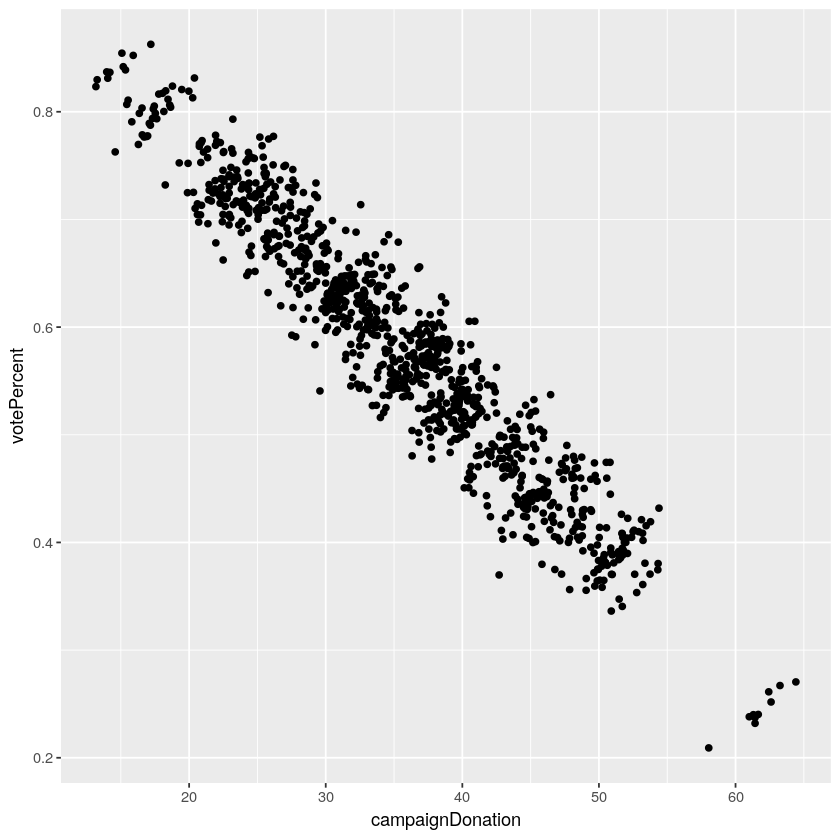

In [7]:
votingData %>% ggplot(aes(campaignDonation, votePercent)) + geom_point()

#### 1b(iii)
>Regress the vote percent received by Wayne’s party on the campaign donation,
including fixed effects.

In [21]:
# Add county means across years for campaignDonationNorm and votePercent.
votingData %<>% 
group_by(county) %>% 
mutate_at(vars(campaignDonationNorm, votePercent), 
          .funs=list(mean=mean))

In [22]:
# Subtract per-year mean from data.
votingData %<>% transform(
    campaignDonationNorm_demeaned = 
    campaignDonationNorm - campaignDonationNorm_mean,
    votePercent_demeaned = votePercent - votePercent_mean)

In [24]:
summary(lm(votePercent_demeaned ~ campaignDonationNorm_demeaned,
           data=votingData))


Call:
lm(formula = votePercent_demeaned ~ campaignDonationNorm_demeaned, 
    data = votingData)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0224805 -0.0050592  0.0000658  0.0050019  0.0209900 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -1.437e-18  2.255e-04    0.00        1    
campaignDonationNorm_demeaned  1.182e-01  1.634e-03   72.37   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.00713 on 998 degrees of freedom
Multiple R-squared:   0.84,	Adjusted R-squared:  0.8398 
F-statistic:  5238 on 1 and 998 DF,  p-value: < 2.2e-16


>What is the effect of a one standard deviation increase in campaign donation on the share of votes received?

**When controlling for county fixed effects, a one standard deviation increase in campaign donation is associated with an 11.8 increase to the vote share.**

#### 1b(iv)
>Discuss the difference, if any, between (i) and (iii). How is this possible?

**County fixed effects cause the sign of the relationship to switch. This could result from a negative correlation between donations and vote shares at the county level, but a positive correlation within counties. Intuitively this makes sense as Bruce Wayne would want to concentrate donations in low-vote-share counties, while larger donations within counties across years could raise the vote share there.**

#### 1b(v)
>Generate a scatter plot of vote percentage against campaign donations separately for two counties of your choosing.

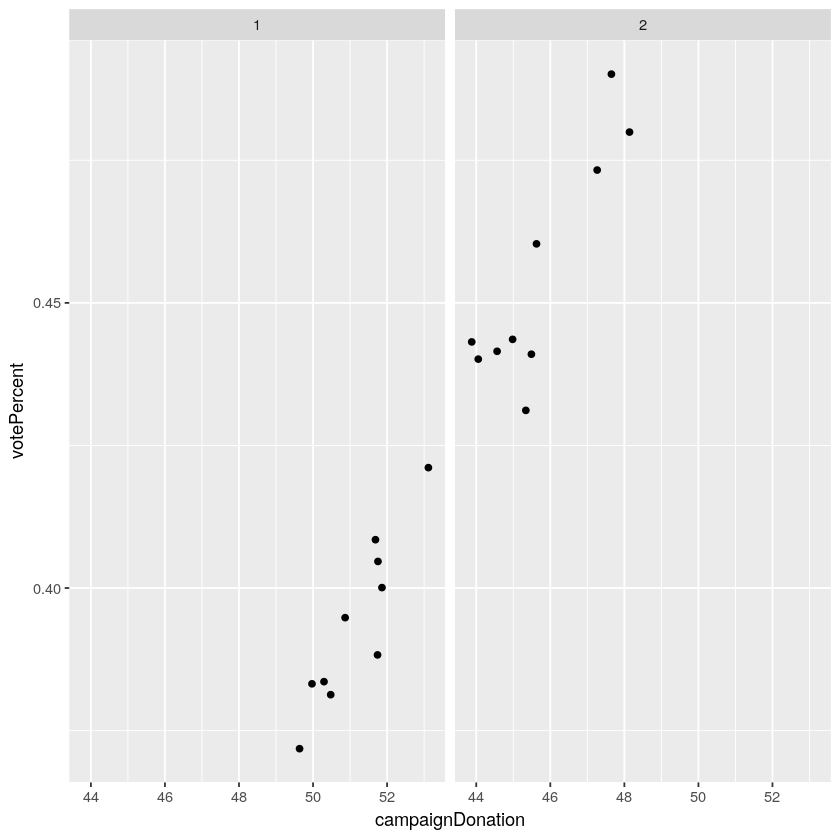

In [19]:
votingData %>% 
subset(county < 3) %>%
ggplot(aes(campaignDonation, votePercent)) + geom_point() + 
facet_grid(, vars(county))

> Compare these pictures to the one in (ii). Does this support your explanation in (iv)?

**Yes, within each county, the vote share increases with the campaign donation, but the county with greater campaign donations (in this case, county 1) also has a lower average vote share.**

## 2

>There is a population of $n$ individuals. They have differing earning potentials, supply one unit of labor, and earn $y_1$ or $y_0$ depending on whether they are of higher earning potential (1) or lower earning potential (0). Every individual belongs to a caste, $h$ or $l$. We put $\lambda_{jc}$ be the fraction of population in potential $j$ and caste $c$. Clearly $\sum_{j,c} \lambda_{jc} = 1$. Define $\lambda_c \equiv \lambda_{1c} + \lambda_{0c}$ and $\lambda_j \equiv \lambda_{jh} + \lambda_{jl}$.

### 2a

>Write a condition such that the low caste types constitute a minority in the population.

$\lambda_l < \lambda_h$

i.e. $(\lambda_{0l} + \lambda_{1l}) < (\lambda_{0h} + \lambda_{1h})$

### 2b

>Interpret the condition that

$\frac{\lambda_{0l}}{\lambda_{1l}}$ > $\frac{\lambda_{0h}}{\lambda_{1h}}$

**Low potential workers are a larger share of the lower caste than of the higher caste.**

### 2c

>Individual income is taxed at rate $\tau$, if it is taxed. There are two ways it can be
redistributed:  
(i) Policy 0: $\tau = 0$, no redistribution.  
(ii) Policy 1: $\tau = 1$, $T$ is given to every individual.  
• Interpret what this means in terms of outcomes for high earning potential
and low earning potential workers.

**Everyone's net income is equal, regardless of potential. This is a net loss for high earners and net gain for low earners.**

>(iii) Policy 2: $\tau = 1$, $\delta_c = \delta$ is given to all low caste types and $\delta_c = 0$ to all high caste types.  
• Interpret what this means in terms of outcomes for high and low caste
individuals.

**All earnings are distributed among the low caste, and the high caste individuals get nothing. All high caste individuals experience a net loss, and all low caste low potential individuals experience a net gain; the net effect on low caste high potential individuals depends on the composition.**

### 2d

>We will assume that the budget is balanced. So the transfers to all individuals sum
up to the entire income in the economy. What does this mean for:  
(i) Policy 1? Express mathematically.

$T = y_0 \lambda_0 + y_1 \lambda_1$

>(ii) Policy 2? Express mathematically.

$\delta \lambda_l = y_0 \lambda_0 + y_1 \lambda_1$

### 2e

>Under each of the 3 policies, payoffs are given by:  
$u_{jc} = y_j$ or $u_{jc} = T$ or $u_{jc} = \delta_c$.  
For each of the responses below, if there are multiple answers, depending on parameter
values, please specify the cases and the threshold parameter values. That is, if a group
will prefer policy 1 if, say $x \geq \bar{x}$ but policy 2 if $x < \bar{x}$, please note this clearly.  
(i) What policy do high earning potential, high caste prefer? Why?

**Policy 1. $T= y_0 \lambda_0 + y_1 \lambda_1<y_1$ so they must prefer 1 over 2, and the high caste gets nothing in policy 3.**

>(ii) What policy do low earning potential, high caste prefer? Why?  

**Policy 2. $T>y_0$ so they must prefer 2 over 1, and the high caste gets nothing in policy 3.**

>(iii) What policy do high earning potential, low caste prefer? Why?  

**Either policy 1 or 3. Their payoff under policy 3 is $\delta = (y_0 \lambda_0 + y_1 \lambda_1) / \lambda_l$** which may be greater or less than $y_1$, i.e. if $y_0 \lambda_0 + y_1 \lambda_1 > y_1 \lambda_l$. Policy 2 is strictly worse than policy 3 for the low caste since they have to share the revenue with the high caste.

>(iv) What policy do low earning potential, low caste prefer? Why?

**Policy 3. Policy 3 is better for the low caste than policy 2, and better than policy 1 for low earners.**

### 2f

>Voting exercise. Let $y_1 = 1$ and $y_0 = 0$. Assume that a plurality always wins.  
(i) If there are fewer low earnings potential low caste people than high earnings
potential high caste people ($\lambda_{0l} < \lambda_{1h}$), and there are more low caste people than high caste people ($\lambda_l > \lambda_h$), which policy wins?

First identify policy preference of high earning potential, low caste individuals.

Under policy 3, their payoff is $\lambda_1 / \lambda_l$. Under policy 1, it is 1. Therefore, if $\lambda_1 > \lambda_l$ they will prefer policy 3. Expanding, this yields $\lambda_{1l} + \lambda_{1h} > \lambda_{0l} + \lambda_{1l}$ or $\lambda_{1h} > \lambda_{0l}$, which is stated as true in the problem. Therefore, this group prefers policy 3.

Policy 1's support is $\lambda_{1h}$.  
Policy 2's support is $\lambda_{0h}$.  
Policy 3's support is $\lambda_{l}$.

It follows from $\lambda_l > \lambda_h$ (as stated in the problem) that $\lambda_l > \lambda_0h$ and $\lambda_l > \lambda_1h$, giving policy 3 a plurality. **Policy 3 wins.**